# NCEI
<br>

- 월평균 활용
- https://apihub.kma.go.kr/
    - 세계기상 > NCEI 관측.통계 > 3. 전세계 지상관측(월통계) : 1763년~2022년
    - ※ NCEI(National Centers for Environmental Information, 국립환경정보센터)는 미국 NOAA의 소속된 기관으로 전세계 기상기후데이터를 수집·제공합니다.
    - ※ 모든 자료가 2022년 12월 까지 존재합니다.
## 참고 자료
- document 파일
    - 자료 소개서
        - GSOM_readme.txt
    - 자료 설명서
        - GSOM_documentation.pdf
    - 연/월 통합 상세 설명서
        - GSOM_GSOY_Description_Document_v1.0.2_20200219.pdf
- 지점정보
    - 링크 내용은 동일함
    - https://www.ncei.noaa.gov/pub/data/noaa/isd-history.txt(내용확인)
    - https://www.ncei.noaa.gov/pub/data/noaa/isd-history.csv(파일다운로드)
- 국가 코드
    - Country list
        - 국가명과 국가 2글자 표현 짝 정리된 것
        - 후에 요청인자 중 stn 구성요소인 지점코드값의 국가 부분을 해석하는데에 사용
        - 293개국 존재
- 파일 리스트
    - File list
        - 파일목록
        - 파일명과 파일 크기가 나열됨
        - 후술될 요청인자 중 stn의 구성요소인 지점코드 값으로 활용할 수 있음
            - 국가 2글자, 망구분 1글자, 지점번호 9글자를 가져올 소스
        - 122236개 있음
- 실제 파일 리스트
    - data_climate/gsom-latest 내부에 존재하는 파일들
    - 122041개 있음

## 활용 library

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfFiletoCountry = pd.read_csv('data_climate/FiletoCountry.csv')
dfFiletoCountry

,RealFileNM,ID,COUNTRY NAME,Name
0,ACW00011604.csv,AC,ANTIGUA AND BARBUDA,ACW00011604
1,ACW00011647.csv,AC,ANTIGUA AND BARBUDA,ACW00011647
2,AE000041196.csv,AE,NaN,AE000041196
3,AEM00041194.csv,AE,NaN,AEM00041194
4,AEM00041217.csv,AE,NaN,AEM00041217
...,...,...,...,...
122036,ZI000067969.csv,ZI,ZIMBABWE,ZI000067969
122037,ZI000067975.csv,ZI,ZIMBABWE,ZI000067975
122038,ZI000067977.csv,ZI,ZIMBABWE,ZI000067977
122039,ZI000067983.csv,ZI,ZIMBABWE,ZI000067983


## 파일 목록 중에 활용할 csv를 불러오는 함수만들긴
- 필요한 것
    - 적용 국가
    

In [3]:
country = 'Germany'
tmp = dfFiletoCountry[dfFiletoCountry['COUNTRY NAME'].str.contains((country.upper())) == True]
tmp

,RealFileNM,ID,COUNTRY NAME,Name
34657,GM000001153.csv,GM,GERMANY,GM000001153
34658,GM000001474.csv,GM,GERMANY,GM000001474
34659,GM000002277.csv,GM,GERMANY,GM000002277
34660,GM000002288.csv,GM,GERMANY,GM000002288
34661,GM000002698.csv,GM,GERMANY,GM000002698
...,...,...,...,...
35772,GMW00035056.csv,GM,GERMANY,GMW00035056
35773,GMW00035104.csv,GM,GERMANY,GMW00035104
35774,GMW00035108.csv,GM,GERMANY,GMW00035108
35775,GMW00035109.csv,GM,GERMANY,GMW00035109


In [4]:
print(len(tmp))
tmpList = tmp['RealFileNM'].values
print(tmpList)

1120
['GM000001153.csv' 'GM000001474.csv' 'GM000002277.csv' ...
 'GMW00035108.csv' 'GMW00035109.csv' 'GMW00035110.csv']


In [6]:
def open_csv(country = 'korea'):
    
    # 변수명 리스트
    varList = []
    
    # 
    csvList = dfFiletoCountry[dfFiletoCountry['COUNTRY NAME'].str.contains((country.upper())) == True]
    cnt = len(csvList)
    stnList = csvList['RealFileNM'].values
    
    # 퇴근 후 수정하기
    
    for STN in stnList:
        varNM = 'df_{}'.format(STN)

        globals()[varNM] = pd.read_csv('data_climate/gsom-latest/' + STN,
                                       encoding = 'euc-kr', engine = 'python')
        varList.append(varNM)
    
    print('갯수: ', cnt)
          
    return varList

In [7]:
koreaList = open_csv()

갯수:  66


In [8]:
# 변수명 리스트에서 str 값을 변수로 활용하는 방법
globals()[koreaList[0]]

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,KNM00047014,1958-09,41.783,126.883,331.0,"CHUNGGANG, KN",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.79,"2,,,S",NaN,NaN
1,KNM00047014,1958-10,41.783,126.883,331.0,"CHUNGGANG, KN",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.42,"1,,,S",NaN,NaN
2,KNM00047014,1958-11,41.783,126.883,331.0,"CHUNGGANG, KN",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.38,"1,,,S",NaN,NaN
3,KNM00047014,1959-01,41.783,126.883,331.0,"CHUNGGANG, KN",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-11.89,"4,,,S",NaN,NaN
4,KNM00047014,1959-02,41.783,126.883,331.0,"CHUNGGANG, KN",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.42,"3,,,S",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,KNM00047014,2021-07,41.783,126.883,331.0,"CHUNGGANG, KN",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.53,"5,,,S"
469,KNM00047014,2022-05,41.783,126.883,331.0,"CHUNGGANG, KN",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.91,",,,S",NaN,NaN
470,KNM00047014,2022-06,41.783,126.883,331.0,"CHUNGGANG, KN",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.85,",,,S",NaN,NaN
471,KNM00047014,2022-07,41.783,126.883,331.0,"CHUNGGANG, KN",NaN,NaN,170.1,"5,S",...,0.0,",S",NaN,NaN,24.84,"5,S",30.76,",,,S",18.92,"5,,,S"


# ! 회의 이후에 필요한 내용 추가하여 시각화 해야함
## EDA


### 시각화 참고 자료
- plt.hist
    - https://lifelong-education-dr-kim.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98-%EB%B6%84%ED%8F%AC%EB%A5%BC-%EA%B0%80%EC%8B%9C%ED%99%94-%ED%95%98%EB%8A%94-matplotlib-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EC%9D%98-hist

In [17]:
dfTMP = globals()[koreaList[0]]
dfTMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          473 non-null    object 
 1   DATE             473 non-null    object 
 2   LATITUDE         473 non-null    float64
 3   LONGITUDE        473 non-null    float64
 4   ELEVATION        473 non-null    float64
 5   NAME             473 non-null    object 
 6   CDSD             22 non-null     float64
 7   CDSD_ATTRIBUTES  22 non-null     object 
 8   CLDD             38 non-null     float64
 9   CLDD_ATTRIBUTES  38 non-null     object 
 10  DP01             8 non-null      float64
 11  DP01_ATTRIBUTES  8 non-null      object 
 12  DP10             8 non-null      float64
 13  DP10_ATTRIBUTES  8 non-null      object 
 14  DP1X             8 non-null      float64
 15  DP1X_ATTRIBUTES  8 non-null      object 
 16  DSND             14 non-null     float64
 17  DSND_ATTRIBUTES 

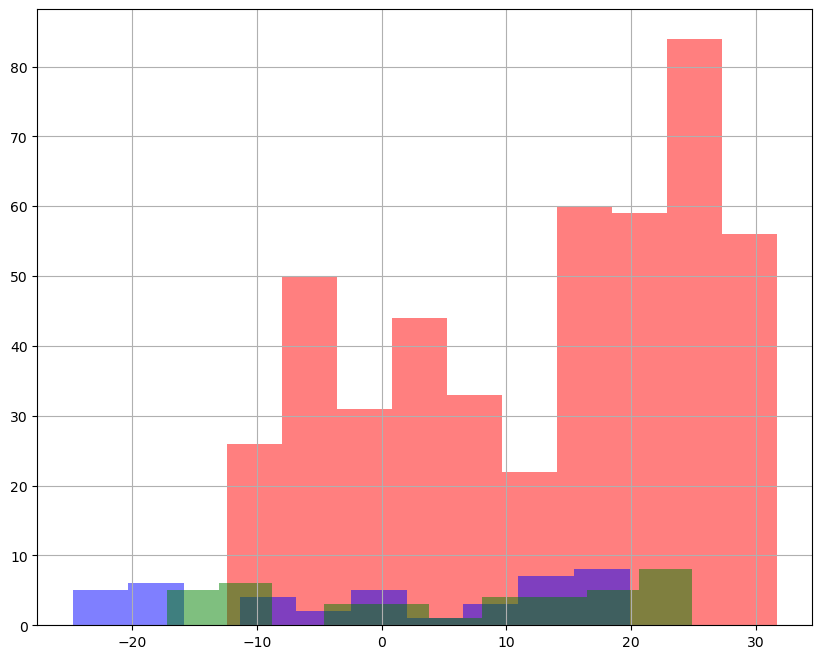

In [30]:
plt.figure(figsize = (10, 8))

dfTMP['TMAX'].hist(color = 'r', alpha = 0.5)
dfTMP['TMIN'].hist(color = 'b', alpha = 0.5)
dfTMP['TAVG'].hist(color = 'g', alpha = 0.5)
plt.show()